In [37]:
from scipy.stats import rv_continuous
import numpy as np
import time
import matplotlib.pyplot as plt

In [38]:
def plot_measure(gen, cnts, title):
    samples = []
    times = []

    for i in range(cnts):
        cnt = i * 100
        start = time.time()
        # measure generation of cnt samples
        for _ in range(cnt):
            gen.rvs()

        end = time.time()

        samples.append(cnt)
        times.append((end - start) * 1000)

    plt.plot(samples, times)
    plt.xlabel('amount of samples')
    plt.ylabel('time in ms')
    plt.title(title)
    plt.show()

def plot_dist(gen, n, title):
    samples = [gen.rvs() for _ in range(n)]
    plt.hist(samples, bins=100)
    plt.xlabel('values')
    plt.ylabel('count of values in bin')
    plt.title(title)
    plt.show()

In [39]:
class log_gen(rv_continuous):
    "Logarithmic distribution"
    def _pdf(self, x):
        return 4 * np.log(x) ** 3 / x

loggen = log_gen('logarithmic', a = 1, b = np.e)

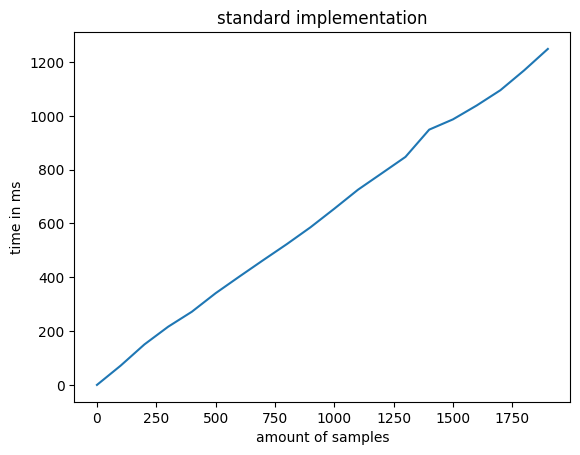

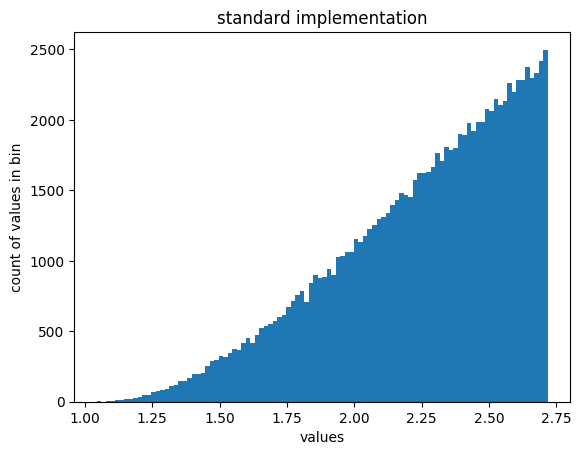

In [40]:
plot_measure(loggen, 20, 'standard implementation')
plot_dist(loggen, 100000, 'standard implementation')

In [41]:
class log_gen(rv_continuous):
    "Logarithmic distribution"
    def _pdf(self, x):
        return 4 * np.log(x) ** 3 / x
    def _ppf(self, x):
        return np.exp(np.power(x, 1/4))

loggen = log_gen('logarithmic', a = 1, b = np.e)

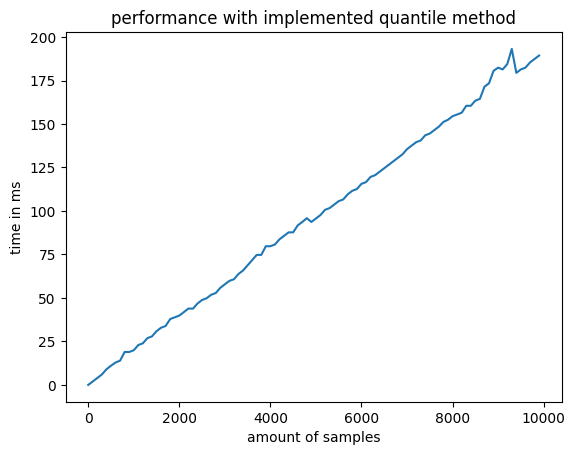

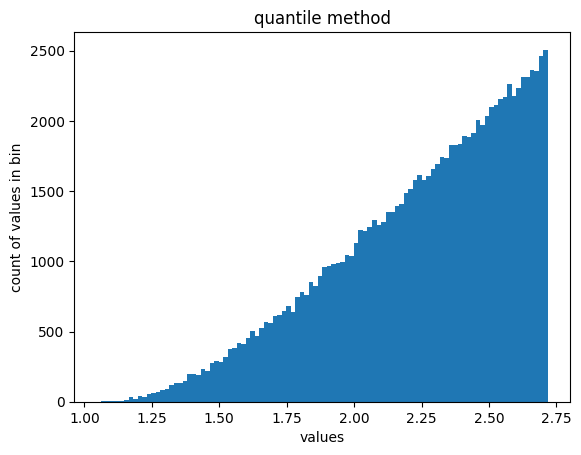

In [42]:
plot_measure(loggen, 100, 'performance with implemented quantile method')
plot_dist(loggen, 100000, 'quantile method')

In [43]:
class log_gen(rv_continuous):
    "Logarithmic distribution"
    def _pdf(self, x):
        return 4 * np.log(x) ** 3 / x
    def _rvs(self, *args, **kwargs):
        while True:
            x = np.random.uniform(1, np.e)
            y = np.random.uniform(0, 4 / np.e)

            if y < self.pdf(x):
                return x

loggen = log_gen('logarithmic', a = 1, b = np.e)

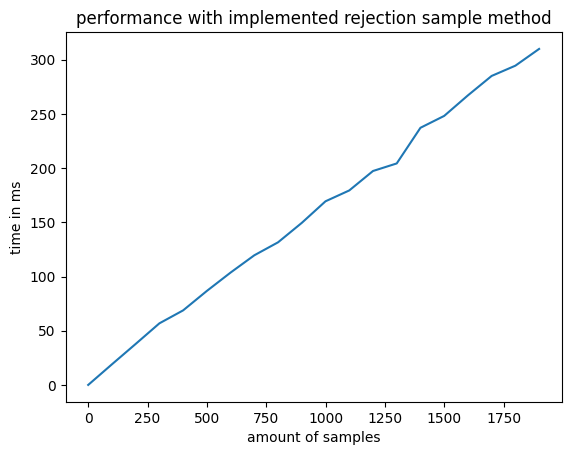

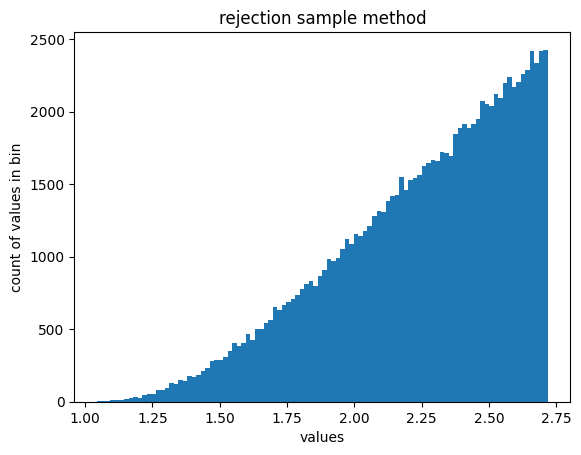

In [44]:
plot_measure(loggen, 20, 'performance with implemented rejection sample method')
plot_dist(loggen, 100000, 'rejection sample method')